In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_5',
                          'wgt_1_.85_.7_.6_.45',
                          'subarctic_winter')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_5',
                               'wgt_1_.85_.7_.6_.45',
                               'subarctic_winter')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
fig.display_hrefanchor()

In [11]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [12]:
table_dgdgs.display_hrefanchor()

In [13]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

In [14]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

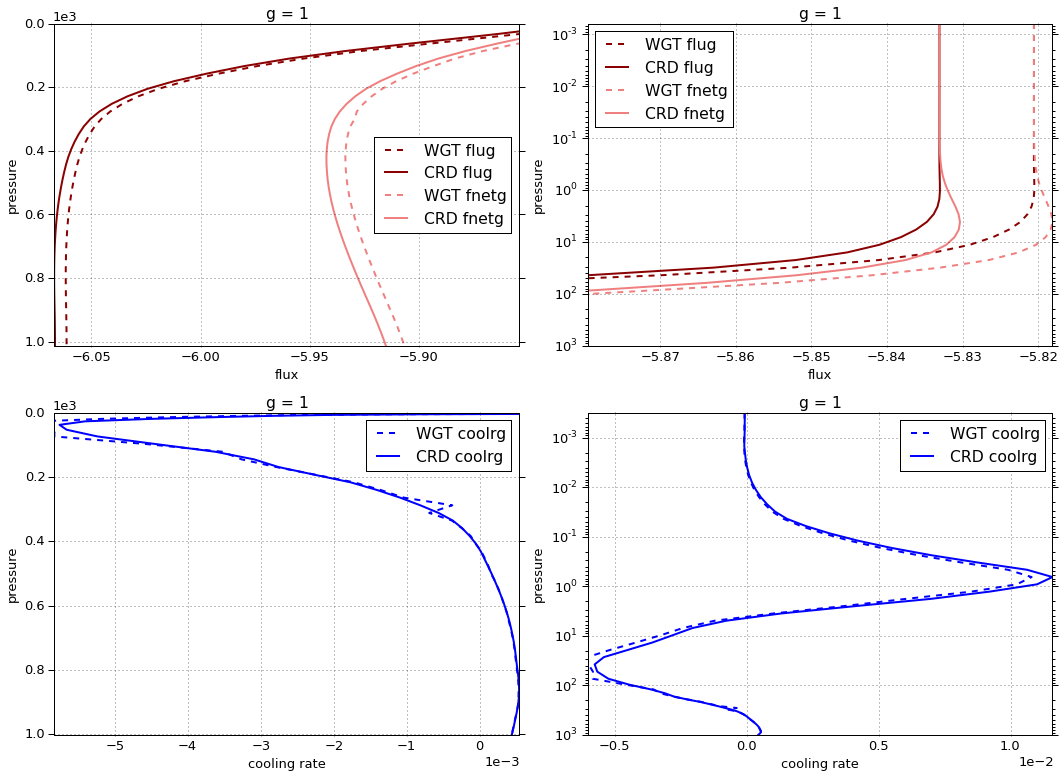

# Figure: flux, cooling rate. g-group 2

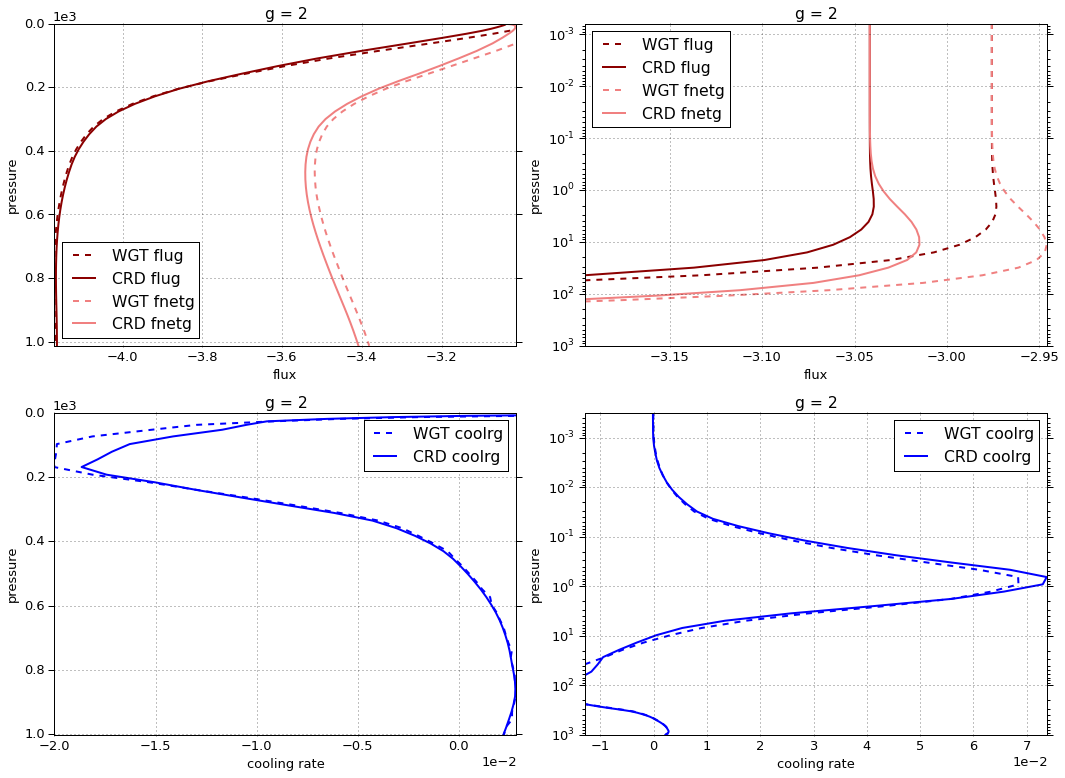

# Figure: flux, cooling rate. g-group 3

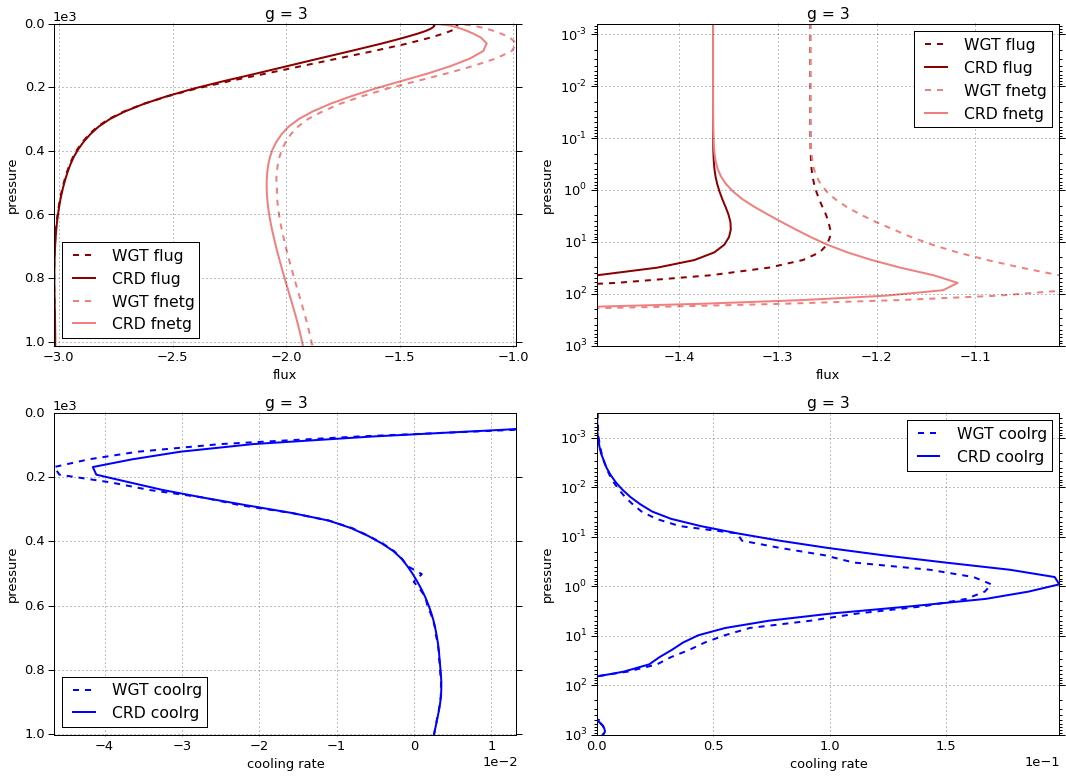

# Figure: flux, cooling rate. g-group 4

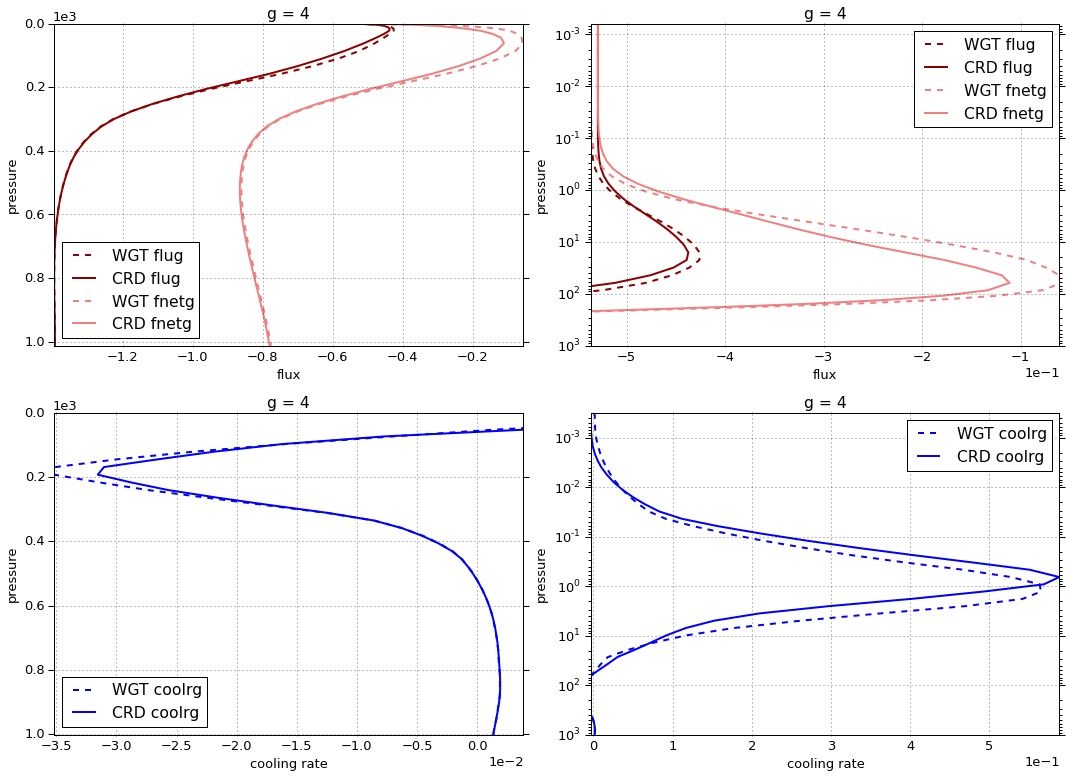

# Figure: flux, cooling rate. g-group 5

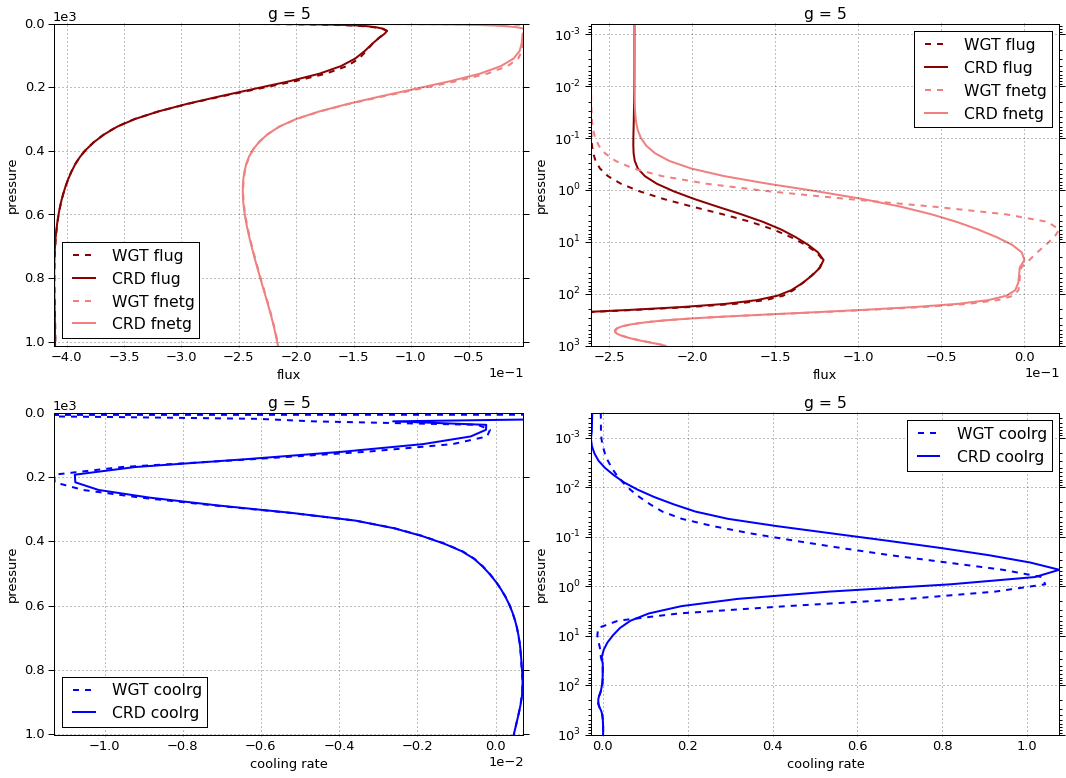

# Figure: flux, cooling rate. g-group total

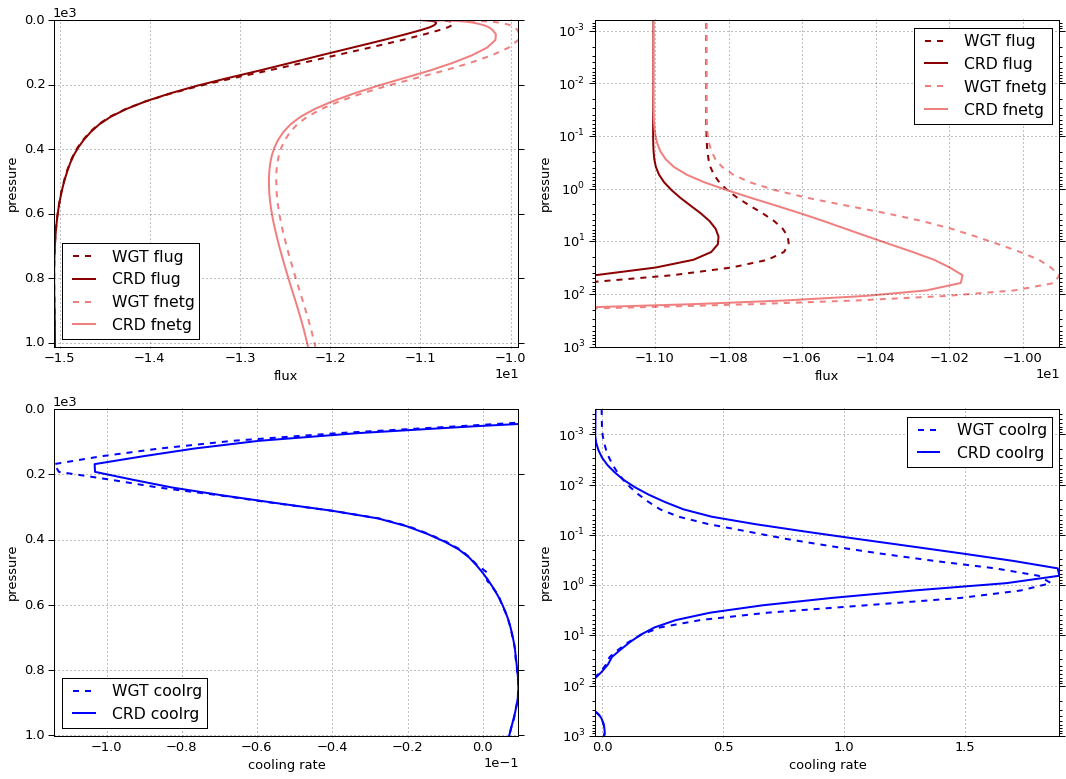

In [15]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [16]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -5.833056  0.000000 -5.833056
  1013     76    -6.066599  0.151389 -5.915210
2 0        1     -3.041736  0.000000 -3.041736
  1013     76    -4.164469  0.756034 -3.408434
3 0        1     -1.365697  0.000000 -1.365697
  1013     76    -3.016682  1.090094 -1.926588
4 0        1     -0.529332  0.000000 -0.529332
  1013     76    -1.393636  0.612974 -0.780661
5 0        1     -0.234751  0.000000 -0.234751
  1013     76    -0.410018  0.194025 -0.215993


WGT


flug      fldg     fnetg
g pressure level                              
1 0        1     -5.820545  0.000000 -5.820545
  1013     76    -6.061312  0.154592 -5.906719
2 0        1     -2.975696  0.000000 -2.975696
  1013     76    -4.169021  0.787561 -3.381459
3 0        1     -1.267135  0.000000 -1.267135
  1013     76    -3.017839  1.132762 -1.885077
4 0        1     -0.536387  0.000000 -0.536387
  1013     76    -1.393431  0.616896 -0.776536
5 0        1     -0.260895  0.000000 -0.260895
  1013     76    -0.409801  0.194105 -0.215696


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.012511  0.000000  0.012511
  1013     76     0.005287  0.003204  0.008491
2 0        1      0.066040  0.000000  0.066040
  1013     76    -0.004552  0.031527  0.026975
3 0        1      0.098561  0.000000  0.098561
  1013     76    -0.001157  0.042669  0.041512
4 0        1     -0.007055  0.000000 -0.007055
  1013     76     0.000204  0.003922  0.004126
5 0        1     -0.026143  0.000000 -0.026143
  1013     76     0.000217  0.000080  0.000297

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000072
  1001.112500 75     0.000441
2 0.000312    1     -0.000145
  1001.112500 75     0.002208
3 0.000312    1      0.000154
  1001.112500 75     0.002555
4 0.000312    1     -0.003166
  1001.112500 75     0.001322
5 0.000312    1     -0.025000
  1001.112500 75     0.000462


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000081
  1001.112500 75     0.000439
2 0.000312    1     -0.000075
  1001.112500 75     0.002240
3 0.000312    1      0.000396
  1001.112500 75     0.002560
4 0.000312    1      0.001531
  1001.112500 75     0.001327
5 0.000312    1     -0.004907
  1001.112500 75     0.000462


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -8.357301e-06
  1001.112500 75    -1.812010e-06
2 0.000312    1      6.931879e-05
  1001.112500 75     3.144600e-05
3 0.000312    1      2.419020e-04
  1001.112500 75     4.444100e-06
4 0.000312    1      4.696654e-03
  1001.112500 75     4.607000e-06
5 0.000312    1      2.009298e-02
  1001.112500 75    -2.908800e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-11.004571,0.000000,-11.004571
1013,76,-15.051403,2.804516,-12.246887



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-10.860658,0.000000,-10.860658
1013,76,-15.051403,2.885916,-12.165487



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.439134e-01,0.000000,0.143913
1013,76,1.400000e-07,0.081401,0.081400


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.028229
1001.112500,75,0.006989



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.003136
1001.112500,75,0.007028



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.025092
1001.112500,75,0.000038


In [17]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.411200,0.402707
2,0.270800,0.276986
3,0.198242,0.200502
4,0.092400,0.092578
5,0.027358,0.027227


In [18]:
writer = pd.ExcelWriter('results.xlsx')

In [19]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 1

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -5.820545  0.000000e+00 -5.820545 -5.833056  0.000000e+00   
0.000624    -5.820545  5.014150e-09 -5.820545 -5.833056  5.143806e-09   
0.000876    -5.820545  7.530231e-09 -5.820545 -5.833056  7.728301e-09   
0.001229    -5.820545  1.251931e-08 -5.820545 -5.833056  1.286706e-08   
0.001723    -5.820545  2.215152e-08 -5.820545 -5.833056  2.281459e-08   
0.002417    -5.820545  4.017834e-08 -5.820545 -5.833056  4.147963e-08   
0.003391    -5.820545  7.317931e-08 -5.820545 -5.833056  7.573462e-08   
0.004757    -5.820545  1.325756e-07 -5.820545 -5.833056  1.375372e-07   
0.006672    -5.820545  2.380577e-07 -5.820545 -5.833056  2.475478e-07   
0.009359    -5.820545  4.234424e-07 -5.820544 -5.833056  4.413214e-07   
0.013128    -5.820545  7.463473e-07 -5.820544 -5.833056  7.795523e-07   
0.018415    -5.820545  1.305270e-06 -5.820544 -5.833057  1.366174e-06   
0.025830    -5.820546  2.266367e-06 -5.820543 -5.833057  2.376796e-06   
0.036232    -5.820546  3.906143e-06 -5.820542 -5.833057  4.104110e-06   
0.050823    -5.820547  6.895050e-06 -5.820540 -5.833058  7.257113e-06   
0.071291    -5.820548  1.265347e-05 -5.820535 -5.833058  1.333762e-05   
0.100000    -5.820549  2.340332e-05 -5.820525 -5.833059  2.469738e-05   
0.140271    -5.820549  4.272549e-05 -5.820507 -5.833060  4.512991e-05   
0.196760    -5.820549  7.659876e-05 -5.820472 -5.833059  8.097042e-05   
0.275997    -5.820546  1.349090e-04 -5.820411 -5.833055  1.426935e-04   
0.387100    -5.820538  2.337949e-04 -5.820304 -5.833044  2.473919e-04   
0.543100    -5.820519  3.982339e-04 -5.820121 -5.833022  4.214862e-04   
0.761700    -5.820499  6.568943e-04 -5.819842 -5.832995  6.949016e-04   
1.068500    -5.820503  1.033408e-03 -5.819470 -5.832992  1.091119e-03   
1.498800    -5.820589  1.553891e-03 -5.819035 -5.833066  1.635280e-03   
2.102400    -5.820871  2.267211e-03 -5.818604 -5.833306  2.374600e-03   
2.949000    -5.821406  3.169015e-03 -5.818237 -5.833819  3.298832e-03   
4.136600    -5.822334  4.240018e-03 -5.818094 -5.834717  4.381772e-03   
5.802500    -5.823830  5.497361e-03 -5.818333 -5.836125  5.637272e-03   
8.139200    -5.825969  6.968649e-03 -5.819000 -5.838147  7.092581e-03   
...               ...           ...       ...       ...           ...   
323.525000  -6.048487  1.169905e-01 -5.931496 -6.053479  1.133129e-01   
347.300000  -6.050735  1.181718e-01 -5.932564 -6.055759  1.145557e-01   
371.075000  -6.052572  1.193226e-01 -5.933249 -6.057626  1.157485e-01   
394.850000  -6.054112  1.205120e-01 -5.933601 -6.059196  1.169293e-01   
418.625000  -6.055381  1.216178e-01 -5.933764 -6.060492  1.180738e-01   
442.400000  -6.056398  1.226971e-01 -5.933701 -6.061533  1.191533e-01   
466.175000  -6.057238  1.237419e-01 -5.933496 -6.062394  1.201990e-01   
489.950000  -6.057981  1.248290e-01 -5.933152 -6.063158  1.212906e-01   
513.725000  -6.058643  1.259386e-01 -5.932704 -6.063839  1.224391e-01   
537.500000  -6.059226  1.271299e-01 -5.932096 -6.064439  1.236394e-01   
561.275000  -6.059735  1.283703e-01 -5.931365 -6.064964  1.248914e-01   
585.050000  -6.060173  1.296524e-01 -5.930521 -6.065417  1.261869e-01   
608.825000  -6.060544  1.309708e-01 -5.929573 -6.065800  1.275210e-01   
632.600000  -6.060853  1.323227e-01 -5.928531 -6.066120  1.288899e-01   
656.375000  -6.061106  1.336869e-01 -5.927419 -6.066382  1.302855e-01   
680.150000  -6.061306  1.350830e-01 -5.926223 -6.066590  1.316996e-01   
703.925000  -6.061460  1.364932e-01 -5.924967 -6.066750  1.331281e-01   
727.700000  -6.061571  1.379155e-01 -5.923656 -6.066866  1.345694e-01   
751.475000  -6.061645  1.393430e-01 -5.922302 -6.066943  1.360157e-01   
775.250000  -6.061685  1.407695e-01 -5.920915 -6.066985  1.374607e-01   
799.025000  -6.061694  1.422005e-01 -5.919493 -6.066995  1.389106e-01   
822

In [20]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 2

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -2.975696  0.000000e+00 -2.975696 -3.041736  0.000000e+00   
0.000624    -2.975696  2.630399e-08 -2.975696 -3.041736  2.943380e-08   
0.000876    -2.975696  3.952632e-08 -2.975696 -3.041736  4.422947e-08   
0.001229    -2.975696  6.575390e-08 -2.975696 -3.041736  7.365068e-08   
0.001723    -2.975696  1.163789e-07 -2.975696 -3.041736  1.305852e-07   
0.002417    -2.975696  2.110517e-07 -2.975696 -3.041736  2.373154e-07   
0.003391    -2.975696  3.841374e-07 -2.975696 -3.041736  4.328906e-07   
0.004757    -2.975696  6.950797e-07 -2.975696 -3.041736  7.849832e-07   
0.006672    -2.975696  1.245939e-06 -2.975695 -3.041737  1.409972e-06   
0.009359    -2.975697  2.211178e-06 -2.975694 -3.041737  2.507071e-06   
0.013128    -2.975697  3.886485e-06 -2.975693 -3.041737  4.414305e-06   
0.018415    -2.975697  6.774472e-06 -2.975690 -3.041738  7.706734e-06   
0.025830    -2.975697  1.171765e-05 -2.975685 -3.041738  1.334887e-05   
0.036232    -2.975696  2.010863e-05 -2.975675 -3.041737  2.293533e-05   
0.050823    -2.975693  3.533032e-05 -2.975658 -3.041736  4.033403e-05   
0.071291    -2.975687  6.454905e-05 -2.975622 -3.041730  7.372702e-05   
0.100000    -2.975673  1.189271e-04 -2.975554 -3.041719  1.358345e-04   
0.140271    -2.975646  2.163688e-04 -2.975429 -3.041694  2.470071e-04   
0.196760    -2.975593  3.866735e-04 -2.975206 -3.041645  4.409846e-04   
0.275997    -2.975494  6.789669e-04 -2.974815 -3.041550  7.730812e-04   
0.387100    -2.975313  1.173221e-03 -2.974140 -3.041375  1.332628e-03   
0.543100    -2.975004  1.993259e-03 -2.973011 -3.041062  2.256177e-03   
0.761700    -2.974531  3.291339e-03 -2.971240 -3.040601  3.704787e-03   
1.068500    -2.973965  5.213636e-03 -2.968752 -3.040059  5.816641e-03   
1.498800    -2.973446  7.921936e-03 -2.965524 -3.039619  8.726964e-03   
2.102400    -2.973228  1.169732e-02 -2.961530 -3.039564  1.267113e-02   
2.949000    -2.973733  1.654103e-02 -2.957192 -3.040335  1.756852e-02   
4.136600    -2.975486  2.236390e-02 -2.953122 -3.042428  2.326357e-02   
5.802500    -2.978964  2.925824e-02 -2.949705 -3.046347  2.982629e-02   
8.139200    -2.984577  3.736174e-02 -2.947215 -3.052486  3.744348e-02   
...               ...           ...       ...       ...           ...   
323.525000  -4.072271  5.844566e-01 -3.487814 -4.065522  5.572593e-01   
347.300000  -4.089893  5.908538e-01 -3.499040 -4.083329  5.630475e-01   
371.075000  -4.104171  5.972728e-01 -3.506898 -4.097826  5.688906e-01   
394.850000  -4.116061  6.035526e-01 -3.512509 -4.109918  5.749025e-01   
418.625000  -4.125759  6.097554e-01 -3.516004 -4.119807  5.808821e-01   
442.400000  -4.133404  6.158589e-01 -3.517545 -4.127665  5.866139e-01   
466.175000  -4.139664  6.215774e-01 -3.518087 -4.134093  5.922519e-01   
489.950000  -4.145141  6.276118e-01 -3.517529 -4.139731  5.981779e-01   
513.725000  -4.149990  6.339833e-01 -3.516007 -4.144699  6.044346e-01   
537.500000  -4.154206  6.406659e-01 -3.513540 -4.149038  6.109836e-01   
561.275000  -4.157839  6.475760e-01 -3.510263 -4.152794  6.178138e-01   
585.050000  -4.160932  6.550374e-01 -3.505894 -4.156000  6.248658e-01   
608.825000  -4.163510  6.622059e-01 -3.501304 -4.158697  6.320954e-01   
632.600000  -4.165660  6.696245e-01 -3.496036 -4.160934  6.394884e-01   
656.375000  -4.167413  6.771276e-01 -3.490286 -4.162752  6.469915e-01   
680.150000  -4.168798  6.847743e-01 -3.484023 -4.164190  6.545571e-01   
703.925000  -4.169854  6.923992e-01 -3.477455 -4.165292  6.621608e-01   
727.700000  -4.170620  7.000865e-01 -3.470533 -4.166096  6.697892e-01   
751.475000  -4.171127  7.079903e-01 -3.463136 -4.166631  6.774041e-01   
775.250000  -4.171404  7.154971e-01 -3.455906 -4.166928  6.849753e-01   
799.025000  -4.171476  7.230748e-01 -3.448402 -4.167012  6.925266e-01   
822

In [21]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 3

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -1.267135  0.000000e+00 -1.267135 -1.365697  0.000000e+00   
0.000624    -1.267135  4.879828e-08 -1.267135 -1.365697  7.099085e-08   
0.000876    -1.267135  7.344760e-08 -1.267135 -1.365697  1.067681e-07   
0.001229    -1.267135  1.227410e-07 -1.267135 -1.365697  1.782791e-07   
0.001723    -1.267135  2.186061e-07 -1.267135 -1.365697  3.172557e-07   
0.002417    -1.267136  3.990940e-07 -1.267135 -1.365697  5.787024e-07   
0.003391    -1.267135  7.310478e-07 -1.267135 -1.365697  1.059122e-06   
0.004757    -1.267135  1.330513e-06 -1.267134 -1.365697  1.925809e-06   
0.006672    -1.267135  2.397294e-06 -1.267133 -1.365697  3.466338e-06   
0.009359    -1.267135  4.273651e-06 -1.267131 -1.365697  6.172390e-06   
0.013128    -1.267134  7.540512e-06 -1.267126 -1.365697  1.087668e-05   
0.018415    -1.267132  1.318616e-05 -1.267119 -1.365696  1.899229e-05   
0.025830    -1.267128  2.286791e-05 -1.267105 -1.365694  3.288164e-05   
0.036232    -1.267121  3.932528e-05 -1.267081 -1.365688  5.643558e-05   
0.050823    -1.267107  6.921002e-05 -1.267037 -1.365675  9.908773e-05   
0.071291    -1.267078  1.266343e-04 -1.266951 -1.365649  1.807646e-04   
0.100000    -1.266980  2.336385e-04 -1.266746 -1.365595  3.322928e-04   
0.140271    -1.266875  4.256711e-04 -1.266449 -1.365491  6.026490e-04   
0.196760    -1.266684  7.619257e-04 -1.265923 -1.365297  1.072330e-03   
0.275997    -1.266347  1.340414e-03 -1.265006 -1.364945  1.871626e-03   
0.387100    -1.265879  2.321603e-03 -1.263557 -1.364314  3.207193e-03   
0.543100    -1.264874  3.956312e-03 -1.260918 -1.363220  5.388132e-03   
0.761700    -1.263300  6.567787e-03 -1.256732 -1.361517  8.771066e-03   
1.068500    -1.261079  1.049717e-02 -1.250582 -1.359180  1.364445e-02   
1.498800    -1.258237  1.613978e-02 -1.242098 -1.356330  2.023546e-02   
2.102400    -1.254941  2.417331e-02 -1.230767 -1.353116  2.895065e-02   
2.949000    -1.251392  3.472277e-02 -1.216669 -1.350108  3.952242e-02   
4.136600    -1.248629  4.772257e-02 -1.200907 -1.348071  5.168503e-02   
5.802500    -1.246950  6.413461e-02 -1.182816 -1.347692  6.588508e-02   
8.139200    -1.247266  8.262402e-02 -1.164642 -1.349514  8.295853e-02   
...               ...           ...       ...       ...           ...   
323.525000  -2.830340  8.820790e-01 -1.948261 -2.825429  8.364074e-01   
347.300000  -2.866704  8.874361e-01 -1.979268 -2.862038  8.419374e-01   
371.075000  -2.895676  8.939544e-01 -2.001722 -2.891388  8.484635e-01   
394.850000  -2.919375  9.010871e-01 -2.018288 -2.915468  8.557950e-01   
418.625000  -2.938321  9.086275e-01 -2.029694 -2.934833  8.634934e-01   
442.400000  -2.953116  9.161486e-01 -2.036967 -2.949960  8.711120e-01   
466.175000  -2.964994  9.235927e-01 -2.041401 -2.962120  8.787485e-01   
489.950000  -2.975182  9.316262e-01 -2.043556 -2.972605  8.868677e-01   
513.725000  -2.984065  9.433196e-01 -2.040746 -2.981695  8.954902e-01   
537.500000  -2.991641  9.507517e-01 -2.040889 -2.989514  9.045026e-01   
561.275000  -2.998109  9.594001e-01 -2.038708 -2.996188  9.138922e-01   
585.050000  -3.003541  9.689975e-01 -2.034544 -3.001806  9.235575e-01   
608.825000  -3.008062  9.782611e-01 -2.029801 -3.006474  9.334074e-01   
632.600000  -3.011766  9.878267e-01 -2.023940 -3.010301  9.434065e-01   
656.375000  -3.014723  9.977147e-01 -2.017008 -3.013379  9.534902e-01   
680.150000  -3.017054  1.007641e+00 -2.009414 -3.015793  9.635656e-01   
703.925000  -3.018819  1.017361e+00 -2.001457 -3.017627  9.736043e-01   
727.700000  -3.020083  1.027225e+00 -1.992858 -3.018957  9.835992e-01   
751.475000  -3.020933  1.036993e+00 -1.983940 -3.019843  9.934880e-01   
775.250000  -3.021393  1.046528e+00 -1.974865 -3.020337  1.003226e+00   
799.025000  -3.021530  1.056080e+00 -1.965449 -3.020489  1.012864e+00   
822

In [22]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 4

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.536387  0.000000e+00 -0.536387 -0.529332  0.000000e+00   
0.000624    -0.536387  2.455139e-07 -0.536387 -0.529332  4.122077e-07   
0.000876    -0.536387  3.680547e-07 -0.536387 -0.529333  6.174558e-07   
0.001229    -0.536387  6.071141e-07 -0.536387 -0.529333  1.017760e-06   
0.001723    -0.536387  1.060540e-06 -0.536386 -0.529334  1.776755e-06   
0.002417    -0.536388  1.893172e-06 -0.536386 -0.529335  3.169871e-06   
0.003391    -0.536388  3.386919e-06 -0.536384 -0.529337  5.667682e-06   
0.004757    -0.536388  6.018390e-06 -0.536382 -0.529340  1.006473e-05   
0.006672    -0.536387  1.058705e-05 -0.536377 -0.529343  1.769156e-05   
0.009359    -0.536386  1.842776e-05 -0.536367 -0.529348  3.076503e-05   
0.013128    -0.536383  3.174897e-05 -0.536351 -0.529354  5.294240e-05   
0.018415    -0.536376  5.421614e-05 -0.536322 -0.529360  9.027125e-05   
0.025830    -0.536364  9.182217e-05 -0.536272 -0.529365  1.525885e-04   
0.036232    -0.536340  1.542277e-04 -0.536185 -0.529366  2.556384e-04   
0.050823    -0.536292  2.651647e-04 -0.536027 -0.529354  4.379296e-04   
0.071291    -0.536197  4.748200e-04 -0.535722 -0.529316  7.798718e-04   
0.100000    -0.536013  8.597947e-04 -0.535153 -0.529221  1.400279e-03   
0.140271    -0.535672  1.540371e-03 -0.534132 -0.529012  2.478043e-03   
0.196760    -0.535056  2.713537e-03 -0.532343 -0.528584  4.289802e-03   
0.275997    -0.533976  4.698412e-03 -0.529278 -0.527745  7.252238e-03   
0.387100    -0.532099  8.004020e-03 -0.524095 -0.526150  1.196651e-02   
0.543100    -0.528858  1.340465e-02 -0.515454 -0.523212  1.921895e-02   
0.761700    -0.523784  2.198809e-02 -0.501796 -0.518483  2.973324e-02   
1.068500    -0.516340  3.503271e-02 -0.481308 -0.511724  4.365615e-02   
1.498800    -0.506352  5.386990e-02 -0.452482 -0.503102  6.012040e-02   
2.102400    -0.493556  7.983894e-02 -0.413717 -0.492510  7.825191e-02   
2.949000    -0.479072  1.124670e-01 -0.366605 -0.480740  9.629764e-02   
4.136600    -0.464686  1.490528e-01 -0.315633 -0.469086  1.141116e-01   
5.802500    -0.451676  1.876695e-01 -0.264006 -0.458531  1.336369e-01   
8.139200    -0.440723  2.259373e-01 -0.214786 -0.449477  1.569029e-01   
...               ...           ...       ...       ...           ...   
323.525000  -1.263353  4.780182e-01 -0.785335 -1.261276  4.720909e-01   
347.300000  -1.289952  4.804829e-01 -0.809469 -1.287943  4.746511e-01   
371.075000  -1.310809  4.838632e-01 -0.826946 -1.309006  4.781555e-01   
394.850000  -1.327578  4.879218e-01 -0.839656 -1.326028  4.823336e-01   
418.625000  -1.340814  4.922972e-01 -0.848517 -1.339519  4.868189e-01   
442.400000  -1.350988  4.966806e-01 -0.854308 -1.349908  4.913035e-01   
466.175000  -1.359004  5.010546e-01 -0.857949 -1.358144  4.958105e-01   
489.950000  -1.365864  5.057410e-01 -0.860123 -1.365152  5.005960e-01   
513.725000  -1.371694  5.107290e-01 -0.860965 -1.371153  5.056527e-01   
537.500000  -1.376645  5.158869e-01 -0.860759 -1.376258  5.109282e-01   
561.275000  -1.380832  5.212417e-01 -0.859591 -1.380570  5.163821e-01   
585.050000  -1.384327  5.267219e-01 -0.857605 -1.384166  5.219562e-01   
608.825000  -1.387183  5.322840e-01 -0.854899 -1.387128  5.276073e-01   
632.600000  -1.389519  5.379304e-01 -0.851588 -1.389537  5.333045e-01   
656.375000  -1.391367  5.435407e-01 -0.847826 -1.391461  5.390096e-01   
680.150000  -1.392821  5.491073e-01 -0.843713 -1.392959  5.446775e-01   
703.925000  -1.393906  5.546426e-01 -0.839263 -1.394091  5.502905e-01   
727.700000  -1.394691  5.601056e-01 -0.834585 -1.394909  5.558411e-01   
751.475000  -1.395209  5.655364e-01 -0.829672 -1.395452  5.613011e-01   
775.250000  -1.395495  5.708139e-01 -0.824681 -1.395755  5.666519e-01   
799.025000  -1.395582  5.760108e-01 -0.819572 -1.395852  5.719172e-01   
822

In [23]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 5

wgt                               crd                    
                 flug          fldg     fnetg      flug      fldg     fnetg
pressure                                                                   
0.000000    -0.260895  0.000000e+00 -0.260895 -0.234751  0.000000 -0.234751
0.000624    -0.260896  7.800080e-07 -0.260895 -0.234755  0.000002 -0.234753
0.000876    -0.260896  1.173065e-06 -0.260895 -0.234756  0.000003 -0.234754
0.001229    -0.260897  1.928346e-06 -0.260895 -0.234759  0.000004 -0.234755
0.001723    -0.260899  3.339108e-06 -0.260895 -0.234764  0.000007 -0.234756
0.002417    -0.260901  5.890542e-06 -0.260895 -0.234771  0.000013 -0.234758
0.003391    -0.260904  1.039921e-05 -0.260893 -0.234782  0.000022 -0.234759
0.004757    -0.260908  1.822410e-05 -0.260890 -0.234798  0.000039 -0.234759
0.006672    -0.260914  3.161013e-05 -0.260883 -0.234820  0.000068 -0.234753
0.009359    -0.260922  5.425047e-05 -0.260868 -0.234853  0.000116 -0.234737
0.013128    -0.260931  9.216626e-05 -0.260839 -0.234896  0.000196 -0.234700
0.018415    -0.260940  1.552117e-04 -0.260785 -0.234952  0.000328 -0.234624
0.025830    -0.260946  2.592660e-04 -0.260687 -0.235022  0.000545 -0.234478
0.036232    -0.260944  4.295582e-04 -0.260514 -0.235103  0.000894 -0.234209
0.050823    -0.260921  7.286243e-04 -0.260192 -0.235197  0.001498 -0.233699
0.071291    -0.260851  1.288409e-03 -0.259563 -0.235306  0.002601 -0.232705
0.100000    -0.260685  2.306416e-03 -0.258378 -0.235409  0.004539 -0.230870
0.140271    -0.260308  4.083931e-03 -0.256224 -0.235442  0.007769 -0.227673
0.196760    -0.259568  7.095891e-03 -0.252472 -0.235261  0.012914 -0.222347
0.275997    -0.258155  1.204618e-02 -0.246109 -0.234561  0.020760 -0.213801
0.387100    -0.255503  2.007131e-02 -0.235432 -0.232715  0.032172 -0.200543
0.543100    -0.250680  3.267266e-02 -0.218007 -0.228473  0.047819 -0.180655
0.761700    -0.242849  5.163975e-02 -0.191210 -0.221250  0.066976 -0.154275
1.068500    -0.231537  7.823516e-02 -0.153302 -0.210973  0.086469 -0.124504
1.498800    -0.217128  1.109740e-01 -0.106154 -0.198685  0.101383 -0.097302
2.102400    -0.199882  1.451844e-01 -0.054697 -0.184822  0.110258 -0.074564
2.949000    -0.181596  1.703172e-01 -0.011278 -0.170497  0.114489 -0.056008
4.136600    -0.164781  1.787463e-01  0.013966 -0.157314  0.116575 -0.040739
5.802500    -0.151091  1.721075e-01  0.021017 -0.146423  0.118536 -0.027887
8.139200    -0.140525  1.584850e-01  0.017960 -0.137688  0.120962 -0.016726
...               ...           ...       ...       ...       ...       ...
323.525000  -0.356108  1.415107e-01 -0.214597 -0.355725  0.140985 -0.214740
347.300000  -0.367265  1.425589e-01 -0.224706 -0.366894  0.142053 -0.224841
371.075000  -0.375986  1.439919e-01 -0.231994 -0.375674  0.143512 -0.232162
394.850000  -0.382978  1.456905e-01 -0.237287 -0.382729  0.145235 -0.237494
418.625000  -0.388477  1.474891e-01 -0.240987 -0.388286  0.147063 -0.241224
442.400000  -0.392661  1.492775e-01 -0.243383 -0.392537  0.148870 -0.243666
466.175000  -0.395964  1.510505e-01 -0.244914 -0.395883  0.150669 -0.245214
489.950000  -0.398742  1.529204e-01 -0.245822 -0.398712  0.152561 -0.246151
513.725000  -0.401105  1.548775e-01 -0.246227 -0.401119  0.154543 -0.246576
537.500000  -0.403100  1.569070e-01 -0.246193 -0.403154  0.156592 -0.246562
561.275000  -0.404777  1.589807e-01 -0.245796 -0.404865  0.158695 -0.246170
585.050000  -0.406163  1.610923e-01 -0.245071 -0.406284  0.160828 -0.245455
608.825000  -0.407302  1.632256e-01 -0.244076 -0.407447  0.162976 -0.244471
632.600000  -0.408224  1.653585e-01 -0.242866 -0.408390  0.165127 -0.243263
656.375000  -0.408954  1.674732e-01 -0.241481 -0.409139  0.167267 -0.241872
680.150000  -0.409520  1.695766e-01 -0.239943 -0.409722  0.169382 -0.240340
703.925000  -0.409947  1.716319e-01 -0.238315 -0.410161  0.171464 -0.238697
727.700000  -0.410255  1.736734e-01 -0.236582 -0.410477  0.173512 -0.236965
751.475000  -0.410459  1.756573e-01 -0.234802 -0.410687  0.175517 

In [24]:
g = 1

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 1

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000081,-0.000072,8.357301e-06
0.000750,-0.000086,-0.000076,9.906964e-06
0.001052,-0.000099,-0.000086,1.308247e-05
0.001476,-0.000098,-0.000091,7.236782e-06
0.002070,-0.000085,-0.000064,2.111788e-05
0.002904,-0.000057,-0.000031,2.659665e-05
0.004074,-0.000010,0.000022,3.243260e-05
0.005714,0.000060,0.000094,3.376665e-05


In [25]:
g = 2

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 2

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000075,-0.000145,-6.931879e-05
0.000750,-0.000042,-0.000124,-8.192906e-05
0.001052,0.000026,-0.000078,-1.044448e-04
0.001476,0.000173,0.000069,-1.037997e-04
0.002070,0.000397,0.000315,-8.174687e-05
0.002904,0.000714,0.000608,-1.053938e-04
0.004074,0.001143,0.001058,-8.556930e-05
0.005714,0.001708,0.001693,-1.467940e-05


In [26]:
g = 3

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 3

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,0.000396,0.000154,-0.000242
0.000750,0.000559,0.000276,-0.000283
0.001052,0.000898,0.000612,-0.000286
0.001476,0.001408,0.001135,-0.000273
0.002070,0.002091,0.001835,-0.000256
0.002904,0.002981,0.003054,0.000074
0.004074,0.004117,0.004233,0.000116
0.005714,0.005546,0.006028,0.000482


In [27]:
g = 4

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 4

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,0.001531,-0.003166,-0.004697
0.000750,0.002233,-0.002947,-0.005181
0.001052,0.003646,-0.002255,-0.005901
0.001476,0.005782,-0.000965,-0.006747
0.002070,0.008588,0.001634,-0.006954
0.002904,0.012165,0.005313,-0.006852
0.004074,0.016627,0.010427,-0.006200
0.005714,0.022102,0.017397,-0.004705


In [28]:
g = 5

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 5

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.004907,-0.025000,-2.009298e-02
0.000750,-0.004411,-0.026124,-2.171351e-02
0.001052,-0.003313,-0.028063,-2.475035e-02
0.001476,-0.000161,-0.025824,-2.566349e-02
0.002070,0.004784,-0.019937,-2.472132e-02
0.002904,0.011740,-0.010405,-2.214496e-02
0.004074,0.020952,0.005012,-1.594042e-02
0.005714,0.032688,0.025864,-6.823526e-03


In [29]:
writer.save()

In [30]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
!ls

results.ipynb  results.xlsx
